In [92]:
import time
from math import sqrt
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [101]:
def soft_thresh(x, l):
    return np.sign(x) * np.maximum(np.abs(x) - l, 0.)


def ista(A, b, l, maxit):
    x= np.array([[0], [0]])
    loss= []
    time0 = time.time()
#     print(time0)
    
    b0=[]
    b1=[]
    #b2=[]
    #print(x.shape)
    A_T = A.transpose()
    #print(A_T)
    L = linalg.norm(A) **2
    #print(L)
    for _ in range(maxit):
        x = soft_thresh(x - (np.dot(A_T , (np.dot(A,x)  - b)))* (1/L) , l/L)
        this_loss = 0.5 * linalg.norm(A.dot(x) - b) ** 2 + l * linalg.norm(x, 1)
        loss.append((time.time() - time0, this_loss))
        #print(pobj)
        b0.append(x[0])
        b1.append(x[1])
        #2.append(x[1])
    #print('This is b0 ' , b0)
    #print('This is b1 ' , b1)
    times, cost = map(np.array, zip(*loss))
    #print('The value of B0 and B1 is : ')
    return x , b0 , b1, cost, times

In [42]:
A = np.array([[1,0], [1,1]])
b = np.array([[0], [-2]])
print(A)
print(b)
l=0.001
x, b0,b1, cost, times = ista(A, b, l, 30)


[[1 0]
 [1 1]]
[[ 0]
 [-2]]


[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[9.85082742e-01 6.58345196e-01 4.39981719e-01 2.94046214e-01
 1.96515383e-01 1.31334103e-01 8.77725012e-02 5.86596456e-02
 3.92030986e-02 2.62000039e-02 1.75098456e-02 1.17020858e-02
 7.82067499e-03 5.22667142e-03 3.49306091e-03 2.33446367e-03
 1.56015620e-03 1.04267519e-03 6.96835073e-04 4.65705066e-04
 3.11237503e-04 2.08004573e-04 1.39012497e-04 9.29040837e-05
 6.20891572e-05 4.149509

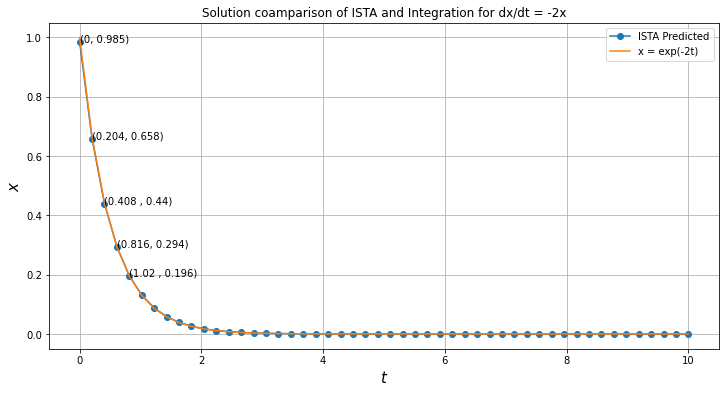

In [55]:
x = np.linspace(0,10,50)
y = np.linspace(0,10,50)
#print(x)
y = b0[-1] +  b1[-1]*x
#print(np.exp(y))
fig = plt.figure(figsize =(12, 6))
annotations=["(0, 0.985)","(0.204, 0.658)","(0.408 , 0.44)","(0.816, 0.294)","(1.02 , 0.196)"]
plt.plot(x, np.exp(y) , marker ='o', label= 'ISTA Predicted')
plt.plot(x , np.exp(-2*x) , label = 'x = exp(-2t)')
plt.legend()
for i, label in enumerate(annotations):
    plt.text(x[i], np.exp(y)[i],label)
# plt.xlim(-1, 1)
# plt.ylim(-1,1)

plt.title('Solution coamparison of ISTA and Integration for dx/dt = -2x')
plt.ylabel('$x$',fontsize=15)
plt.xlabel('$t$',fontsize=15)
plt.grid()
plt.show()

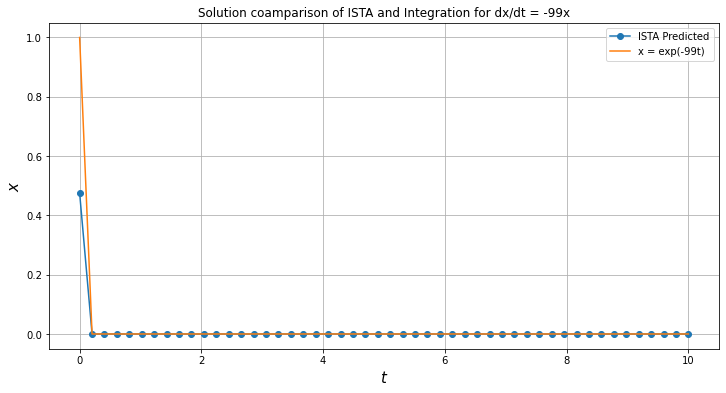

In [58]:
#----------------------------------------------------------------------------------------------------------------------#


A = np.array([[1,0], [1,1]])
b = np.array([[0], [-99]])
#print(A)
#print(b)
l=0.001
x, b0,b1, cost, times = ista(A, b, l, 30)


#----------------------------------------------------------------------------------------------------------------------#

x = np.linspace(0,10,50)
y = np.linspace(0,10,50)
#print(x)


y = b0[-1] +  b1[-1]*x
#print(np.exp(y))




fig = plt.figure(figsize =(12, 6))
#annotations=["(0, 0.985)","(0.204, 0.658)","(0.408 , 0.44)","(0.816, 0.294)","(1.02 , 0.196)"]
plt.plot(x, np.exp(y) , marker ='o', label= 'ISTA Predicted')
plt.plot(x , np.exp(-99*x) , label = 'x = exp(-99t)')
plt.legend()
#for i, label in enumerate(annotations):
    #plt.text(x[i], np.exp(y)[i],label)
# plt.xlim(-1, 1)
# plt.ylim(-1,1)

plt.title('Solution coamparison of ISTA and Integration for dx/dt = -99x')
plt.ylabel('$x$',fontsize=15)
plt.xlabel('$t$',fontsize=15)
plt.grid()
plt.show()


In [102]:
A = np.array([[1,0], [1,1] ])
#b = np.array([[np.log(np.exp(-3.0*0) + 4/3)], [np.log(np.exp(-3.0*1.0) + 4/3)] ,[np.log(np.exp(-3.0*2.0) + 4/3)]])
b= np.array([[4],[7]])
#print(A)

l=0.001
x, b0, b1, cost, times = ista(A, b, l, 30)

print(b0[-1])
print(b1[-1])
#----------------------------------------------------------------------------------------------------------------------#

x = np.linspace(0,10,50)
y = np.linspace(0,10,50)
#print(x)


# y = b0[-1] +  b1[-1]*x + b2[-1]*(x**2)
# #print(b0[-1] , b1[-1])
# #print(np.exp(y))



+++
# fig = plt.figure(figsize =(12, 6))
# annotations=["(0,2.31052086 )","", "", "", "", "(1.02040816.,1.37688705 )"]
# plt.plot(x,np.exp(y) , marker ='o', label= 'ISTA Predicted')
# real = np.exp(-3*x) + 4/3
# plt.plot(x , real , label = 'x = exp(-3t) + 4/3')
# plt.legend()
# for i, label in enumerate(annotations):
#     plt.text(x[i], np.exp(y)[i],label)
# # plt.xlim(-4, 4)
# # plt.ylim(-4,4)

# plt.title('Solution coamparison of ISTA and Integration for dx/dt = -99x')
# plt.ylabel('$x$',fontsize=15)
# plt.xlabel('$t$',fontsize=15)
# plt.grid()
# plt.show()

[4.00396127]
[2.99259053]


In [15]:
nums = [10, 20, 30, 40, 50, 60, 70, 80, 90]
nums[0]

10

In [14]:
X = np.array([[1,1], [1,1]])
Y = np.array([1, 1])
X@Y

array([2, 2])

In [119]:
def Cost(y_obs):
    def cost(Y):
        '''Squared Error Loss'''
        n = y_obs.shape[0]
        err = np.linalg.norm(y_obs - Y, 2, axis = 1)

        return np.sum(err)/n

    return cost

In [121]:
## Generate Data
#Initial Condition
Y0 = 1
print(Y0[1])
#Space to compute solutions
#True param value
theta = -1

sol = BlackBox(ODESYS, y0 = Y0, t = t)

# #Corupt the observations with noise
# y_obs = sol[:,:2] + np.random.normal(0,0.05,size = sol[:,:2].shape)

# plt.scatter(t,y_obs[:,0], marker = '.', alpha = 0.5, label = 'S')
# plt.scatter(t,y_obs[:,1], marker = '.', alpha = 0.5, label = 'I')


# plt.legend()


TypeError: 'int' object is not subscriptable

In [122]:
theta_iter = 1.5
cost = Cost(y_obs[:,:2])
grad_C = autograd.grad(cost)

maxiter = 100
learning_rate = 1 #Big steps
for i in range(maxiter):

    sol = BlackBox(ODESYS,y0 = Y0, t = t, args = tuple([theta_iter]))

    Y = sol[:,:2]

    theta_iter -=learning_rate*(grad_C(Y)*sol[:,-2:]).sum()

    if i%10==0:
        print(theta_iter)

print('YYYEAAAAHHH!')

TypeError: ODESYS() takes 2 positional arguments but 3 were given

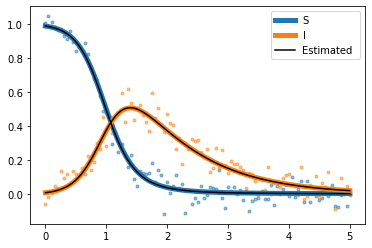

In [33]:
sol = BlackBox(ODESYS, y0 = Y0, t = t, args = tuple([theta_iter]))
true_sol = BlackBox(ODESYS, y0 = Y0, t = t, args = tuple([theta]))


plt.plot(t,sol[:,0], label = 'S', color = 'C0', linewidth = 5)
plt.plot(t,sol[:,1], label = 'I', color = 'C1', linewidth = 5)

plt.scatter(t,y_obs[:,0], marker = '.', alpha = 0.5)
plt.scatter(t,y_obs[:,1], marker = '.', alpha = 0.5)


plt.plot(t,true_sol[:,0], label = 'Estimated ', color = 'k')
plt.plot(t,true_sol[:,1], color = 'k')

plt.legend()